In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dsn = pd.read_csv('Telecom_Dataset.csv')

In [3]:
dsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    object
 1   Gender               200 non-null    object
 2   ARPU                 200 non-null    int64 
 3   Duration_in_network  200 non-null    int64 
 4   Ad_on_services       200 non-null    object
 5   Age                  200 non-null    int64 
 6   Churn                200 non-null    object
dtypes: int64(3), object(4)
memory usage: 11.1+ KB


In [4]:
dsn.head()

,CustomerID,Gender,ARPU,Duration_in_network,Ad_on_services,Age,Churn
0,8SE1XAFS,Male,674,33,No,56,Yes
1,PKCIOF65,Female,963,14,Yes,31,Yes
2,RH83004D,Male,842,21,Yes,48,Yes
3,HVZIC438,Male,340,48,No,22,Yes
4,1O7HACJV,Male,663,20,Yes,52,No


In [5]:
dsn.describe()

,ARPU,Duration_in_network,Age
count,200.00000,200.000000,200.000000
mean,566.62000,59.535000,45.225000
std,252.96085,35.591326,16.475179
min,101.00000,1.000000,18.000000
25%,332.00000,27.000000,30.000000
50%,572.00000,57.500000,45.000000
75%,773.00000,94.250000,59.250000
max,999.00000,119.000000,74.000000


In [6]:
# Identifying categorical columns
categorical_columns = []
for column in dsn.columns:
    if dsn[column].dtype == 'object':
        categorical_columns.append(column)

# Identifying numerical columns
numerical_columns = []
for column in dsn.columns:
    if dsn[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)

# Displaying the separated columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['CustomerID', 'Gender', 'Ad_on_services', 'Churn']
Numerical Columns: ['ARPU', 'Duration_in_network', 'Age']


In [8]:
#Categorical Columns: ['CustomerID', 'Gender', 'Ad_on_services', 'Churn']
#Numerical Columns: ['ARPU', 'Duration_in_network', 'Age']

In [9]:
# Value counts of Churn with percentage
churn_counts = dsn['Churn'].value_counts()
churn_percentages = dsn['Churn'].value_counts(normalize=True) * 100

In [10]:
print(churn_counts)

No     149
Yes     51
Name: Churn, dtype: int64


In [11]:
print(churn_percentages)

No     74.5
Yes    25.5
Name: Churn, dtype: float64


In [12]:
gender_counts = dsn['Gender'].value_counts()
print(gender_counts)

Male      100
Female    100
Name: Gender, dtype: int64


In [13]:
addon_service_counts = dsn['Ad_on_services'].value_counts()
print(addon_service_counts)

Yes    103
No      97
Name: Ad_on_services, dtype: int64


In [14]:
# Crosstab of Gender with Churn
gender_churn_crosstab = pd.crosstab(dsn['Gender'], dsn['Churn'])
print(gender_churn_crosstab)

Churn   No  Yes
Gender         
Female  78   22
Male    71   29


In [15]:
# Crosstab of Addon_services with Churn
addonservices_churn_crosstab = pd.crosstab(dsn['Ad_on_services'], dsn['Churn'])
print(addonservices_churn_crosstab)

Churn           No  Yes
Ad_on_services         
No              70   27
Yes             79   24


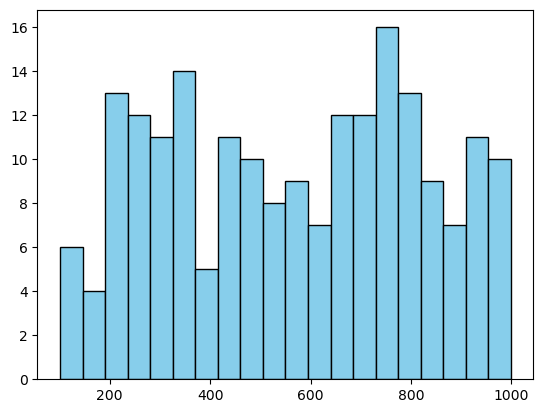

In [16]:
# Histogram for ARPU
plt.hist(dsn['ARPU'], bins=20, color='skyblue', edgecolor='black')
plt.show()

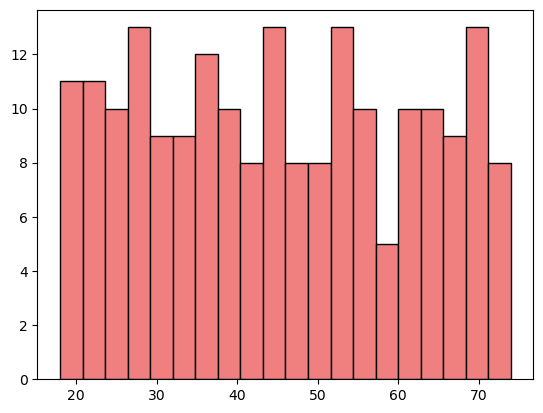

In [17]:
# Histogram for Age
plt.hist(dsn['Age'], bins=20, color='lightcoral', edgecolor='black')
plt.show()

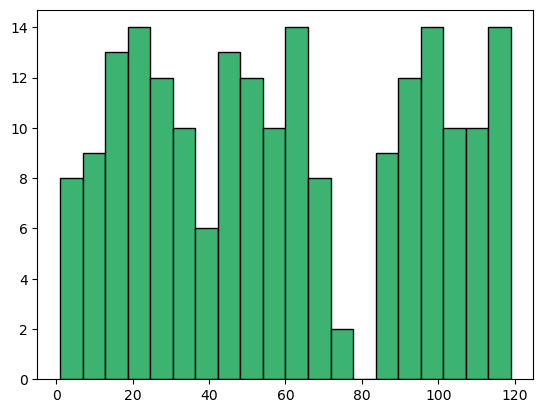

In [18]:
# Histogram for Duration_in_network

plt.hist(dsn['Duration_in_network'], bins=20, color='mediumseagreen', edgecolor='black')
plt.show()

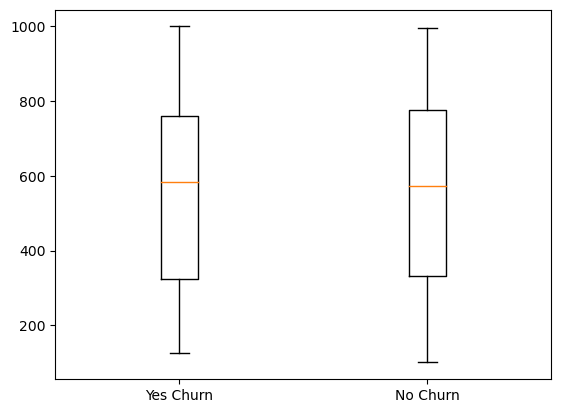

In [19]:
# Box plot comparing Churners vs. Non-Churners for ARPU

plt.boxplot([dsn[dsn['Churn'] == 'Yes']['ARPU'], dsn[dsn['Churn'] == 'No']['ARPU']], labels=['Yes Churn', 'No Churn'])
plt.show()

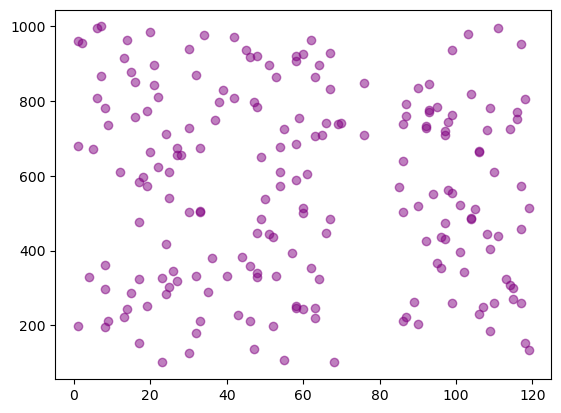

In [20]:
# Scatter Plot ARPU vs. Duration_in_network

plt.scatter(dsn['Duration_in_network'], dsn['ARPU'], color='purple', alpha=0.5)
plt.show()

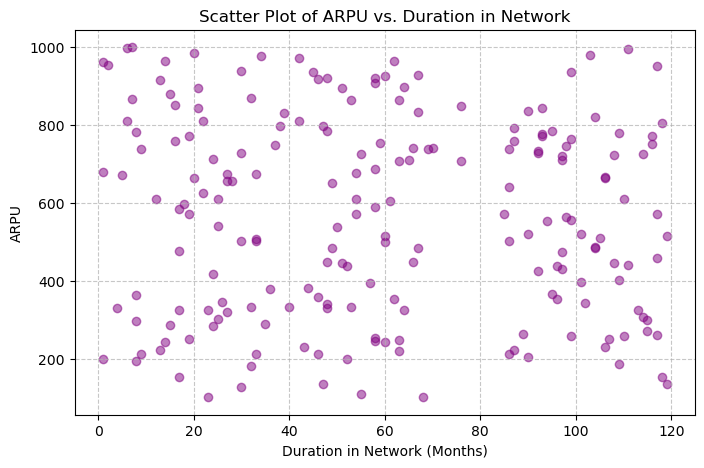

In [21]:
# Scatter Plot ARPU vs. Duration_in_network
plt.figure(figsize=(8, 5))
plt.scatter(dsn['Duration_in_network'], dsn['ARPU'], color='purple', alpha=0.5)
plt.xlabel("Duration in Network (Months)")
plt.ylabel("ARPU")
plt.title("Scatter Plot of ARPU vs. Duration in Network")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Feature Engineering

In [22]:
# Creating Tenure_Group based on Duration_in_network
dsn['Tenure_Group'] = pd.cut(dsn['Duration_in_network'], bins=[0, 12, 36, 60, 120], 
                              labels=['New', 'Intermediate', 'Experienced', 'Loyal'])

In [23]:
print(dsn['Tenure_Group'].value_counts())

Loyal           89
Intermediate    49
Experienced     45
New             17
Name: Tenure_Group, dtype: int64


In [24]:
# Binning Age into categories
dsn['Age_Group'] = pd.cut(dsn['Age'], bins=[0, 25, 45, 65, 100], 
                           labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

In [25]:
print(dsn['Age_Group'].value_counts())

Middle-Aged    77
Senior         64
Elderly        30
Young          29
Name: Age_Group, dtype: int64
